In [222]:
import pandas
import numpy
from ggplot import *
import re
import statsmodels.api as sm
%matplotlib inline

In [213]:
#helper functions

def split_on_letter(s):
    match = re.compile("[^\W\d]").search(s)
    return [s[:match.start()], s[match.start():]]

def dataconversion(dataString):
    result = float(split_on_letter(dataString)[0])
    size = split_on_letter(dataString)[1][0]
    if (size == 'G'):
        result = result * 1000
    elif (size == 'k'): #kilobytes
        result = result / 1000
    elif (size == 'b'): #bytes
        result = result / 1000000
    elif (size == 'T'): #Terras
        result = result * 1000000
    elif (size == 'P'): #Petas, mostly for poise
        result = result * 1000000000
    return result

def removeDollarSign(s):
    return float(s[1:])
            

In [249]:
filename = "data/test_data_sustainability.csv"
susData = pandas.read_csv(filename)
looks = (aes (x = 'wt', # column value for x-axis
            y = 'mpg', # column value for y-axis 
            # size = None, # size values column name (e.g. 10, 100, 30 etc.)
            # shape = None, # shapes column name, uses numbers from 0-25.
                          # 0 - empty shapes (0 is square, 1 is circle, 2 is triangle) 
                          # 15-20 - filled shapes, no border.
                          # 21-25 - filled shapes with border, default is 16 (a dot).
            # color = None, # Column name containing colors, as required.
            # alpha = None  # Column name containing transparency values.
        ))

defaultBackground = geom_point(
    color='steelblue',
    size=200, 
    alpha=0.99, 
    shape=None) 
defaultForeground = geom_point(
    color='pink', 
    size = 40, 
    alpha=0.8, 
    shape=None)


TOTALTIME = 'TotalTime.1'
susData['TotalTimeHours'] = pandas.Series(susData['TotalTime.1'].map(lambda x : x / 3600), index=susData.index)
TEXTSIZE = 'TextSizeNum'
DOMAINSIZE = 'DomainSizeNum'
GEPHISIZE = 'GephiSizeNum'
TOTALTIMEHOURS = 'TotalTimeHours'
COST = 'Cost'
SIZE = 'CollectionTB'
susData['TextSizeNum'] = pandas.Series(susData['TextSize'].map(dataconversion), index=susData.index)
susData['DomainSizeNum'] = pandas.Series(susData['DomainSize'].map(dataconversion), index=susData.index)
susData['GephiSizeNum'] = pandas.Series(susData['GephiSize'].map(dataconversion), index=susData.index)
susData['Cost'] = pandas.Series(susData['AWS4.2'].map(removeDollarSign), index=susData.index)

# For statistics
independent = susData[['TextSizeNum', 'DomainSizeNum', 'GephiSizeNum']]
dependent = susData['TotalTimeHours']



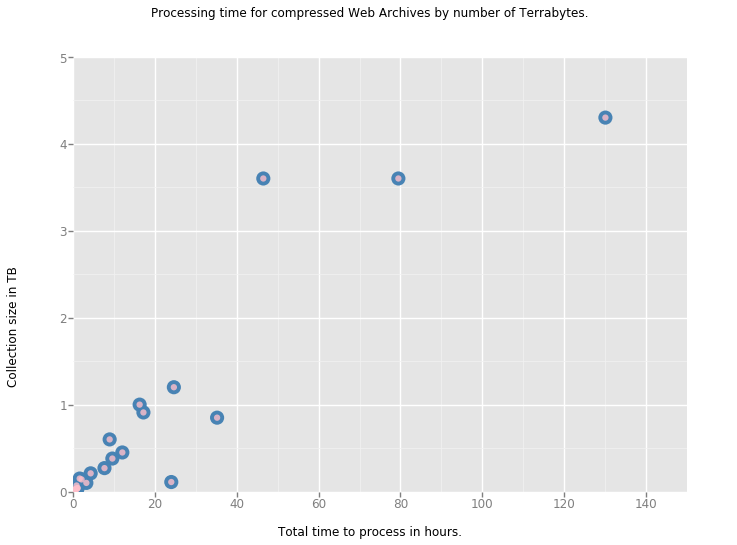

<ggplot: (-9223372036538435303)>

In [208]:
TITLE = ggtitle("Processing time for compressed Web Archives by number of Terrabytes.")
XLAB = xlab("Total time to process in hours.")
YLAB = ylab("Collection size in TB")
XLIM = xlim(0, 150) # set limits for x-axis
YLIM = ylim(0, 5) # set limits for y-axis, if desired

ggplot(susData, aes(TOTALTIMEHOURS, SIZE)) +\
    defaultBackground +\
    defaultForeground +\
    TITLE + XLAB + YLAB +\
    XLIM + YLIM +\
    geom_abline(intercept=20)


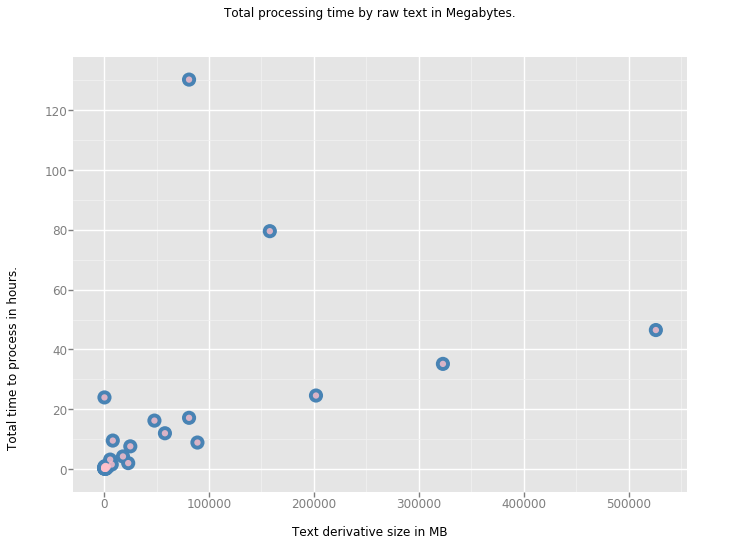

<ggplot: (-9223372036534382995)>

In [258]:
TITLE = ggtitle("Total processing time by raw text in Megabytes.")
XLAB = ylab("Total time to process in hours.")
YLAB = xlab("Text derivative size in MB")
XLIM = xlim(0, 200) # set limits for x-axis
YLIM = ylim(0, 5) # set limits for y-axis, if desired
ggplot(susData, aes(TEXTSIZE, TOTALTIMEHOURS)) +\
    defaultBackground +\
    defaultForeground +\
    TITLE + XLAB + YLAB

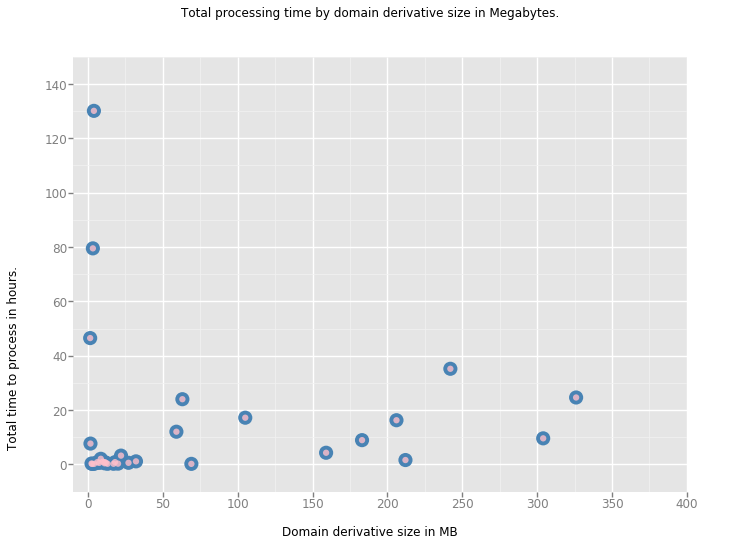

<ggplot: (320130603)>

In [257]:
TITLE = ggtitle("Total processing time by domain derivative size in Megabytes.")
XLAB = ylab("Total time to process in hours.")
YLAB = xlab("Domain derivative size in MB")
XLIM = xlim(-10, 400) # set limits for x-axis
YLIM = ylim(-10, 150) # set limits for y-axis, if desired
ggplot(susData, aes(DOMAINSIZE, TOTALTIMEHOURS)) +\
    defaultBackground +\
    defaultForeground +\
    TITLE + XLAB + YLAB +\
    XLIM + YLIM 

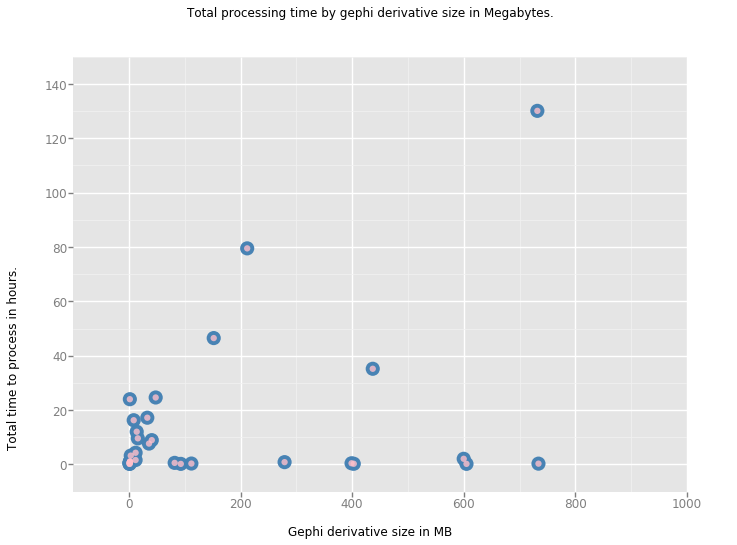

<ggplot: (320130771)>

In [256]:
TITLE = ggtitle("Total processing time by gephi derivative size in Megabytes.")
XLAB = ylab("Total time to process in hours.")
YLAB = xlab("Gephi derivative size in MB")
XLIM = xlim(-100, 1000) # set limits for x-axis
YLIM = ylim(-10, 150) # set limits for y-axis, if desired
ggplot(susData, aes(GEPHISIZE, TOTALTIMEHOURS)) +\
    defaultBackground +\
    defaultForeground +\
    TITLE + XLAB + YLAB +\
    XLIM + YLIM 

In [209]:
susData

,Institution,Name,Number,Count,GB,TextSize,DomainSize,GephiSize,BeginTime,EndTime,...,TSMin,TSSec,TotalTime.1,TotalTimeHours,CollectionTB,AWS4.2,CostTB,TextSizeNum,DomainSizeNum,GephiSizeNum
0,University of Alberta Libraries,Government Information Collection,2901,8067,4300.0,81G,3.9M,732M,2/16/2018 22:43:57,2/22/2018 8:49:02,...,5,5,468305,130.084722,4.30,$69.16,$16.08,81000.0,3.9,732.0
1,University of Alberta Libraries,Circumpolar Collection,2475,3636,3600.0,158G,3.2M,212M,2/13/2018 13:57:05,2/16/2018 21:26:32,...,29,27,286167,79.490833,3.60,$42.56,$11.82,158000.0,3.2,212.0
2,University of Toronto Libraries,Canadian Government Information,3608,8124,3600.0,526G,1.4M,152M,2/7/2018 4:39:01,2/9/2018 3:08:05,...,29,4,167344,46.484444,3.60,$25.00,$6.95,526000.0,1.4,152.0
3,University of Alberta Libraries,University of Alberta Websites,1830,3618,1200.0,202G,326K,48M,2/22/2018 21:08:53,2/23/2018 21:46:17,...,37,24,88644,24.623333,1.20,$13.30,$11.08,202000.0,326.0,48.0
4,University of Toronto Libraries,Hong Kong Politics,4893,959,999.0,48G,206K,8.6M,2/9/2018 16:12:17,2/10/2018 8:27:54,...,15,37,58537,16.260278,1.00,$8.51,$8.52,48000.0,206.0,8.6
5,University of Toronto Libraries,Canadian Labour Unions,288,6003,910.0,81G,105K,33M,2/6/2018 11:26:19,2/7/2018 4:37:27,...,11,8,61868,17.185556,0.91,$9.04,9.15,81000.0,105.0,33.0
6,University of Alberta Libraries,Prairie Provinces,2402,5844,852.0,323G,242K,437M,1/31/2018 20:06:44,2/2/2018 7:18:04,...,11,20,126680,35.188889,0.85,$18.62,18.67,323000.0,242.0,437.0
7,University of Toronto Libraries,Canadian Political Parties and Political Inter...,227,3817,597.0,89G,183K,41M,2/4/2018 11:48:50,2/4/2018 20:44:50,...,56,0,32160,8.933333,0.60,$4.79,4.93,89000.0,183.0,41.0
8,University of Alberta Libraries,Health Sciences Grey Literature Collection,3346,4826,445.0,58G,59K,14M,2/2/2018 16:16:47,2/3/2018 4:18:46,...,1,59,43319,12.033056,0.45,$6.38,6.47,58000.0,59.0,14.0
9,University of Toronto Libraries,Global Summitry Archive,7501,498,380.0,8.3G,304K,16M,2/10/2018 15:20:30,2/11/2018 0:56:06,...,35,36,34536,9.593333,0.38,$5.32,5.41,8300.0,304.0,16.0


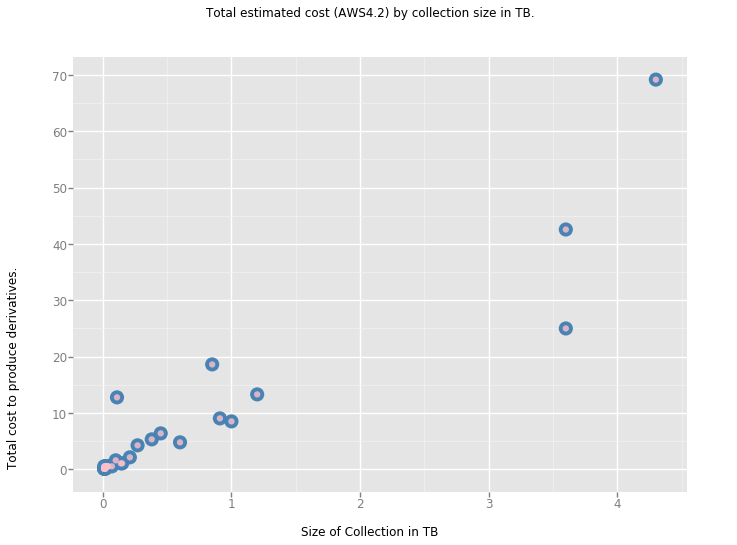

<ggplot: (-9223372036536161073)>

In [244]:
TITLE = ggtitle("Total estimated cost (AWS4.2) by collection size in TB.")
XLAB = ylab("Total cost to produce derivatives.")
YLAB = xlab("Size of Collection in TB")
XLIM = ylim(-10, 80) # set limits for x-axis
YLIM = xlim(-1, 6) # set limits for y-axis, if desired
ggplot(susData, aes(SIZE, COST)) +\
    defaultBackground +\
    defaultForeground +\
    TITLE + XLAB + YLAB
    

In [250]:
independent = sm.add_constant(independent) ## let's add an intercept (beta_0) to our model
model = sm.OLS(dependent, independent).fit()
predictions = model.predict(independent) # make the predictions by the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         TotalTimeHours   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     4.633
Date:                Fri, 21 Sep 2018   Prob (F-statistic):            0.00941
Time:                        17:31:06   Log-Likelihood:                -144.19
No. Observations:                  32   AIC:                             296.4
Df Residuals:                      28   BIC:                             302.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.6502      6.188      0.428      0.672     -10.024      15.325
TextSizeNum       0.0001   3.91e-05      2.854      0.008    3.16e-05       0.000
DomainSizeNum    -0.0107      0.046     -0.233      0.818      -0.105       0.084
GephiSizeNum      0.0360      0.019      1.944      0.062      -0.002       0.074
==============================================================================
Omnibus:                       37.728   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.527
Skew:                           2.539   Prob(JB):                     1.11e-26
Kurtosis:                      10.991   Cond. No.                     1.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [232]:
ind = susData['CollectionTB']
ind = sm.add_constant(ind)
model = sm.OLS(susData['Cost'], ind).fit()
predictions = model.predict(ind) # make the predictions by the model
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     195.9
Date:                Fri, 21 Sep 2018   Prob (F-statistic):           1.09e-14
Time:                        16:17:30   Log-Likelihood:                -98.144
No. Observations:                  32   AIC:                             200.3
Df Residuals:                      30   BIC:                             203.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3629      1.068      0.340      0.736      -1.819       2.545
CollectionTB    12.0464      0.861     13.995      0.000      10.288      13.804
==============================================================================
Omnibus:                       14.274   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               59.603
Skew:                           0.026   Prob(JB):                     1.14e-13
Kurtosis:                       9.686   Cond. No.                         1.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""